# Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Matplolib default parameters
from matplotlib import rcParams
plt.style.use('default')
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# import warning
import warnings
warnings.filterwarnings('ignore')

# Set option max columns display
pd.set_option('max_columns', 150)

# Dataset Overview & Exploration

Breast cancer wisconsin (diagnostic) dataset

In [2]:
df = pd.read_csv('cancer_classification.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

## Univariate Analysis

In [4]:
eda = df.copy()

num = eda.select_dtypes(include='number').columns
cat = eda.select_dtypes(include='object').columns

### Descriptive Analysis

In [5]:
eda[num].describe().T 

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Univarite Analysis (Numeric)

In [6]:
len(num)

31

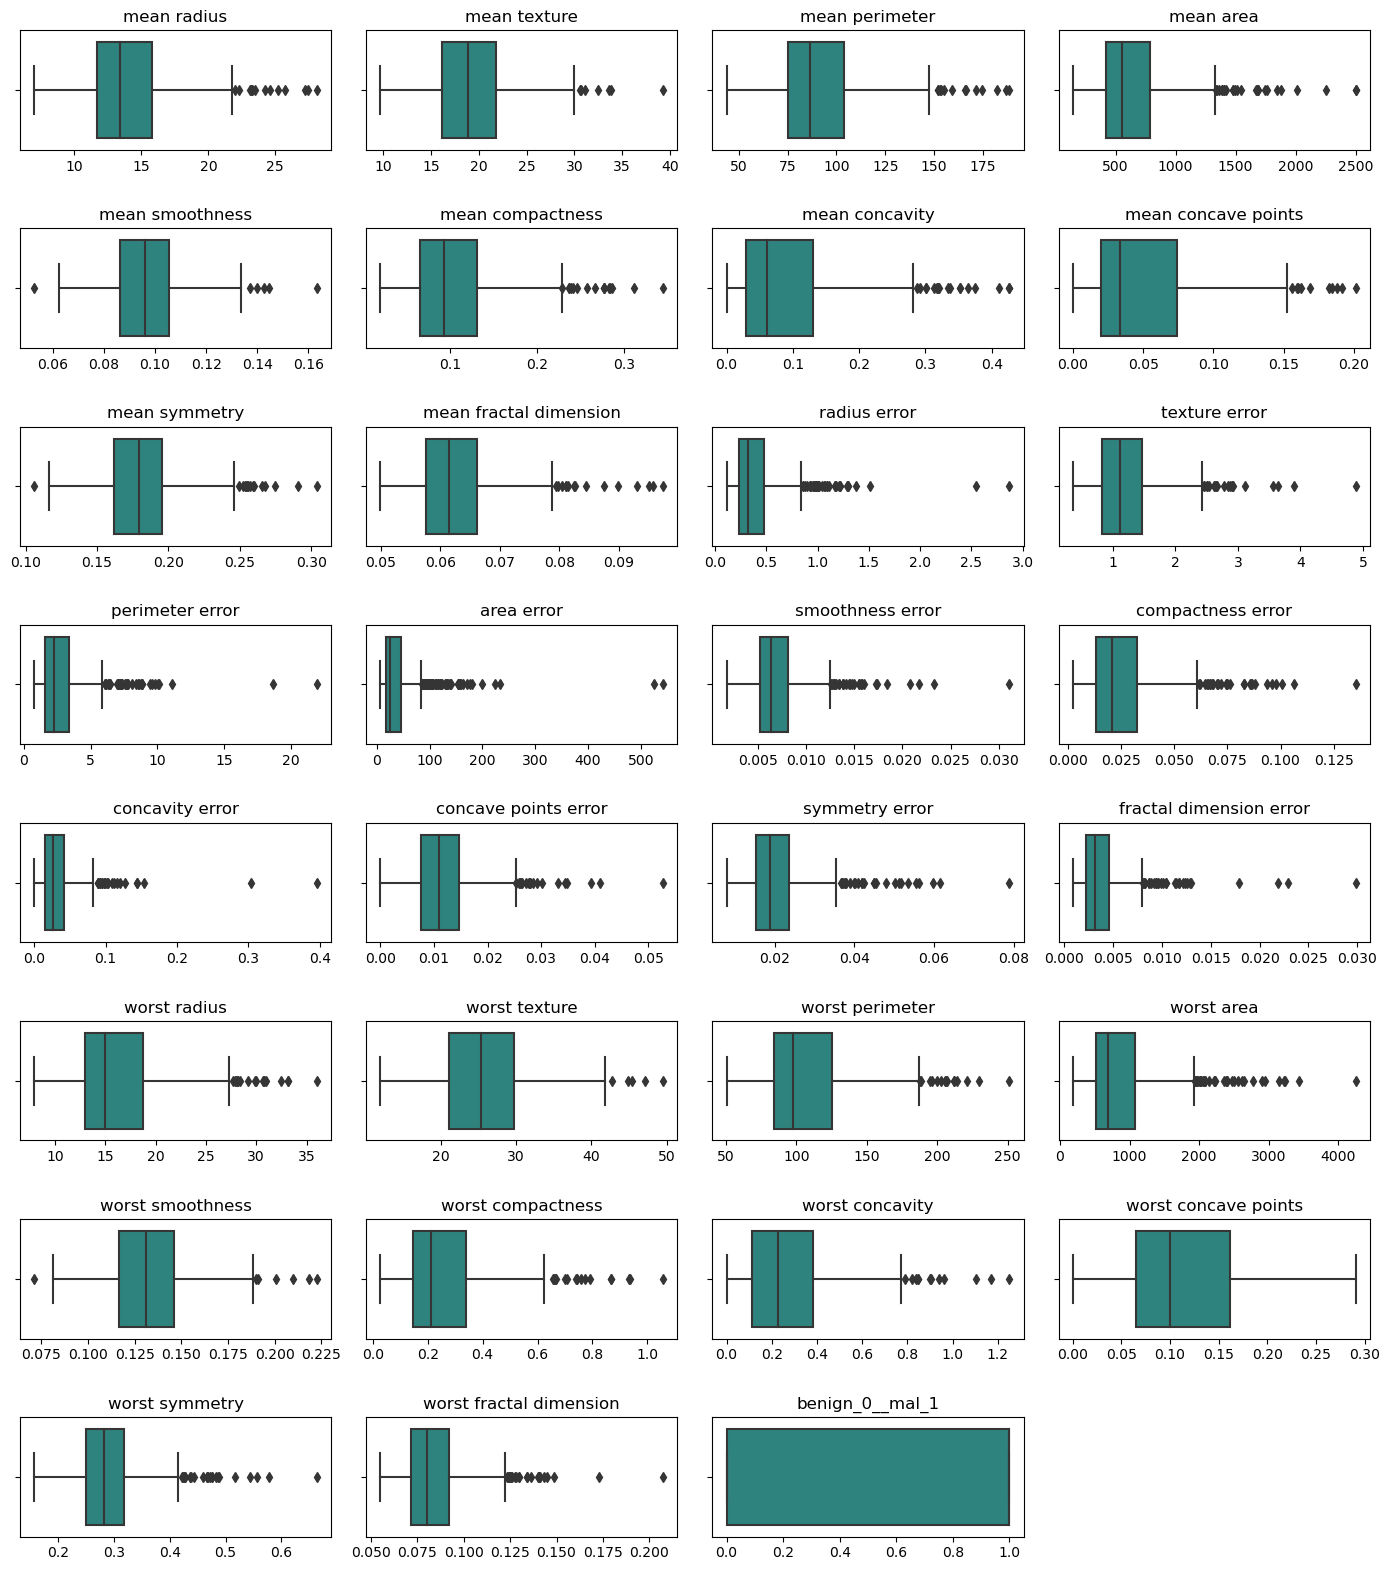

In [8]:
# numeric features analysis
plt.figure(figsize=(14,16))
for i in range(0,len(num)):
    plt.subplot(8,4,i+1)
    sns.boxplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

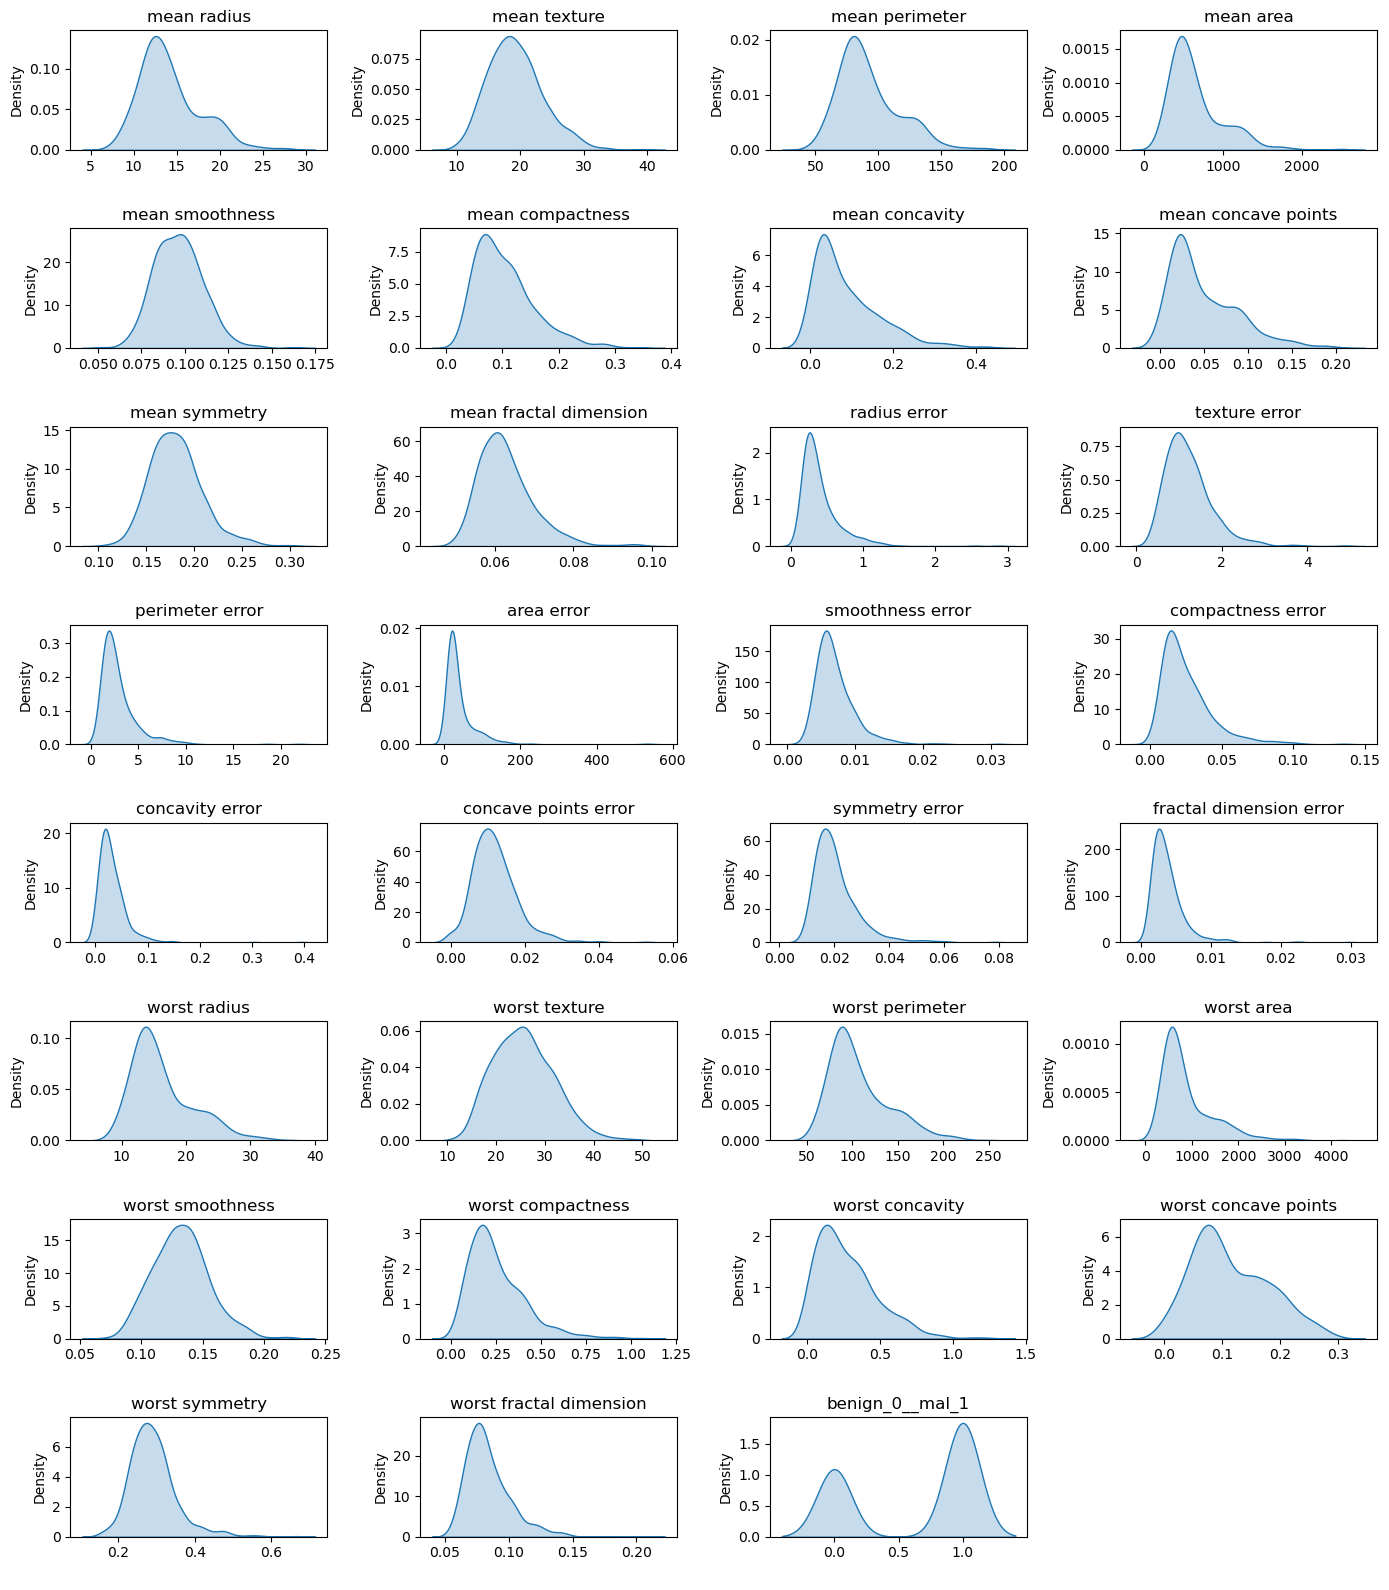

In [10]:
# numeric features analysis
plt.figure(figsize=(14,16))
for i in range(0,len(num)):
    plt.subplot(8,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True)
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

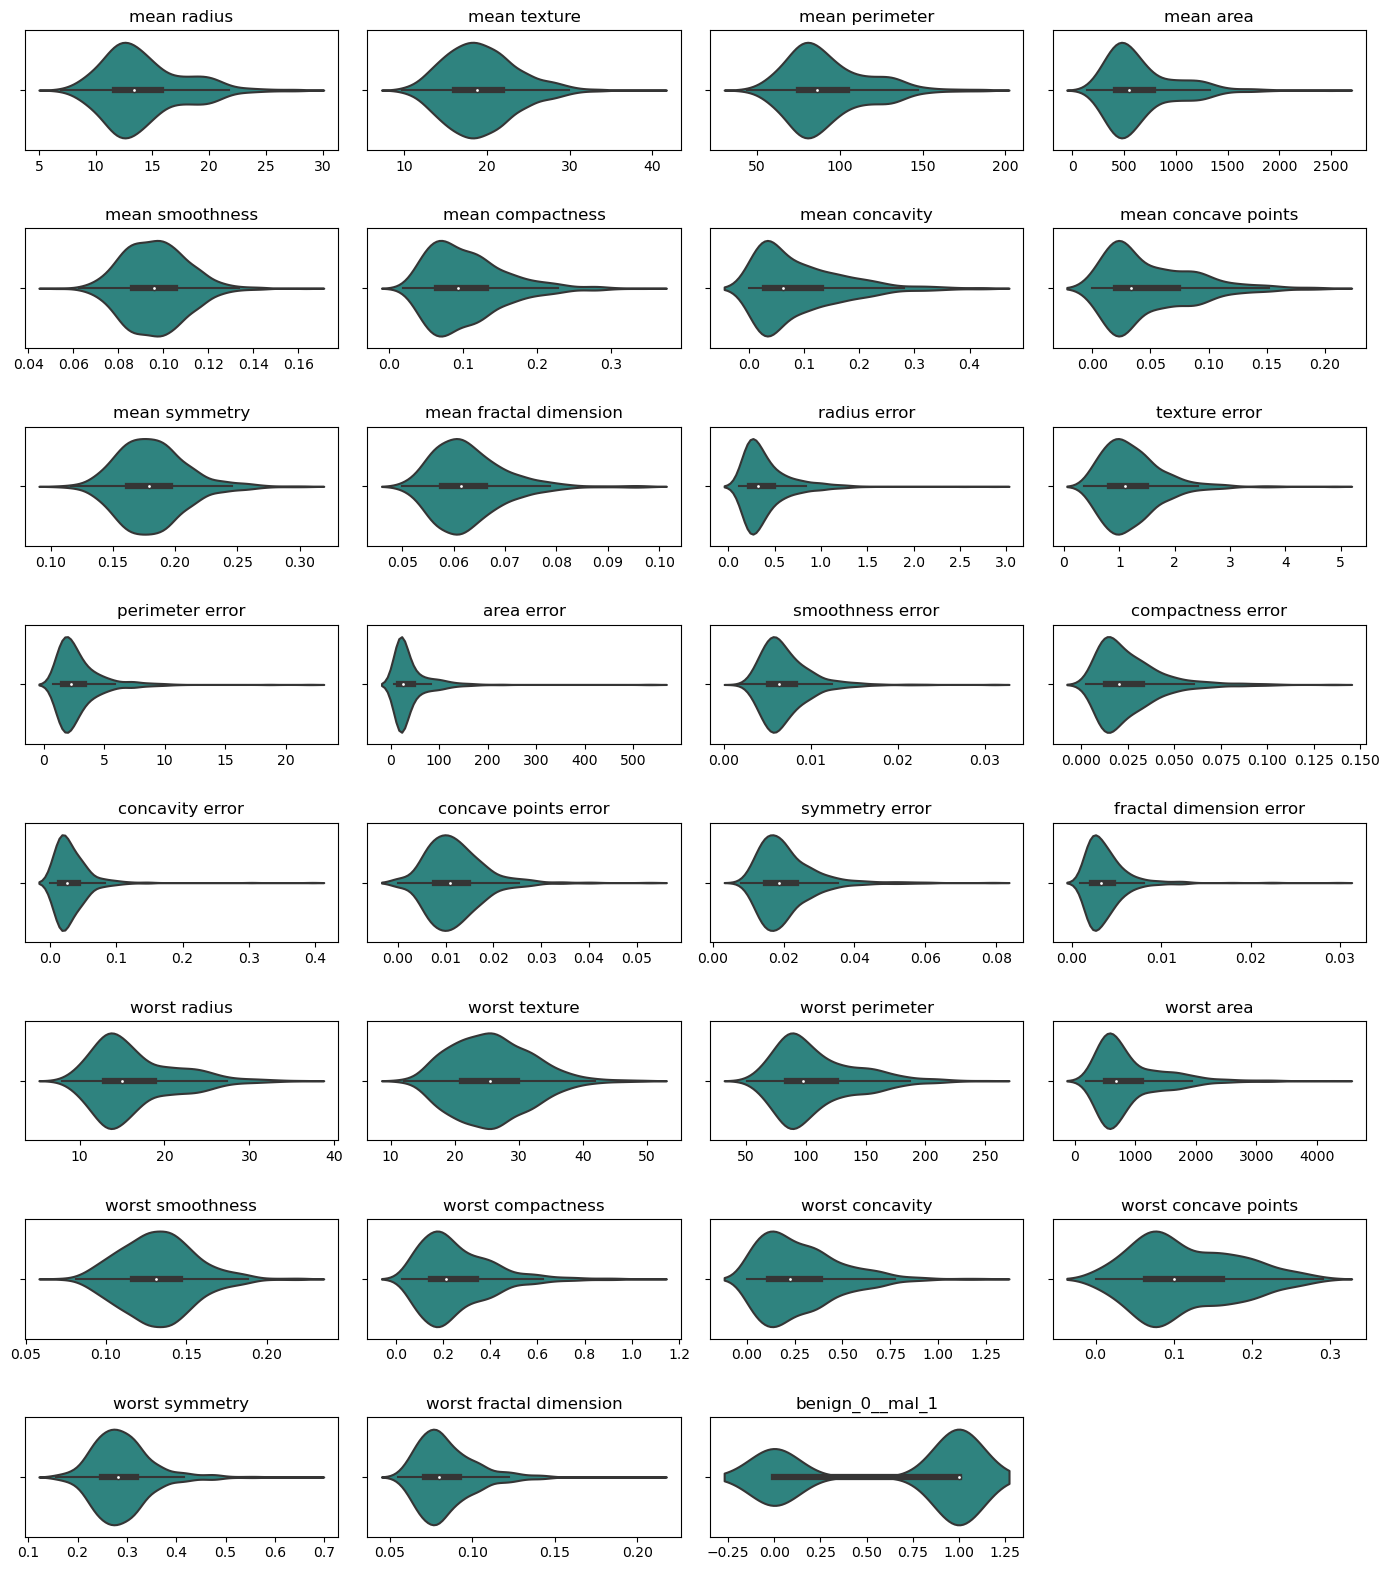

In [11]:
# numeric features analysis
plt.figure(figsize=(14,16))
for i in range(0,len(num)):
    plt.subplot(8,4,i+1)
    sns.violinplot(x=eda[num[i]], palette='viridis')
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

## Bivariate Analysis

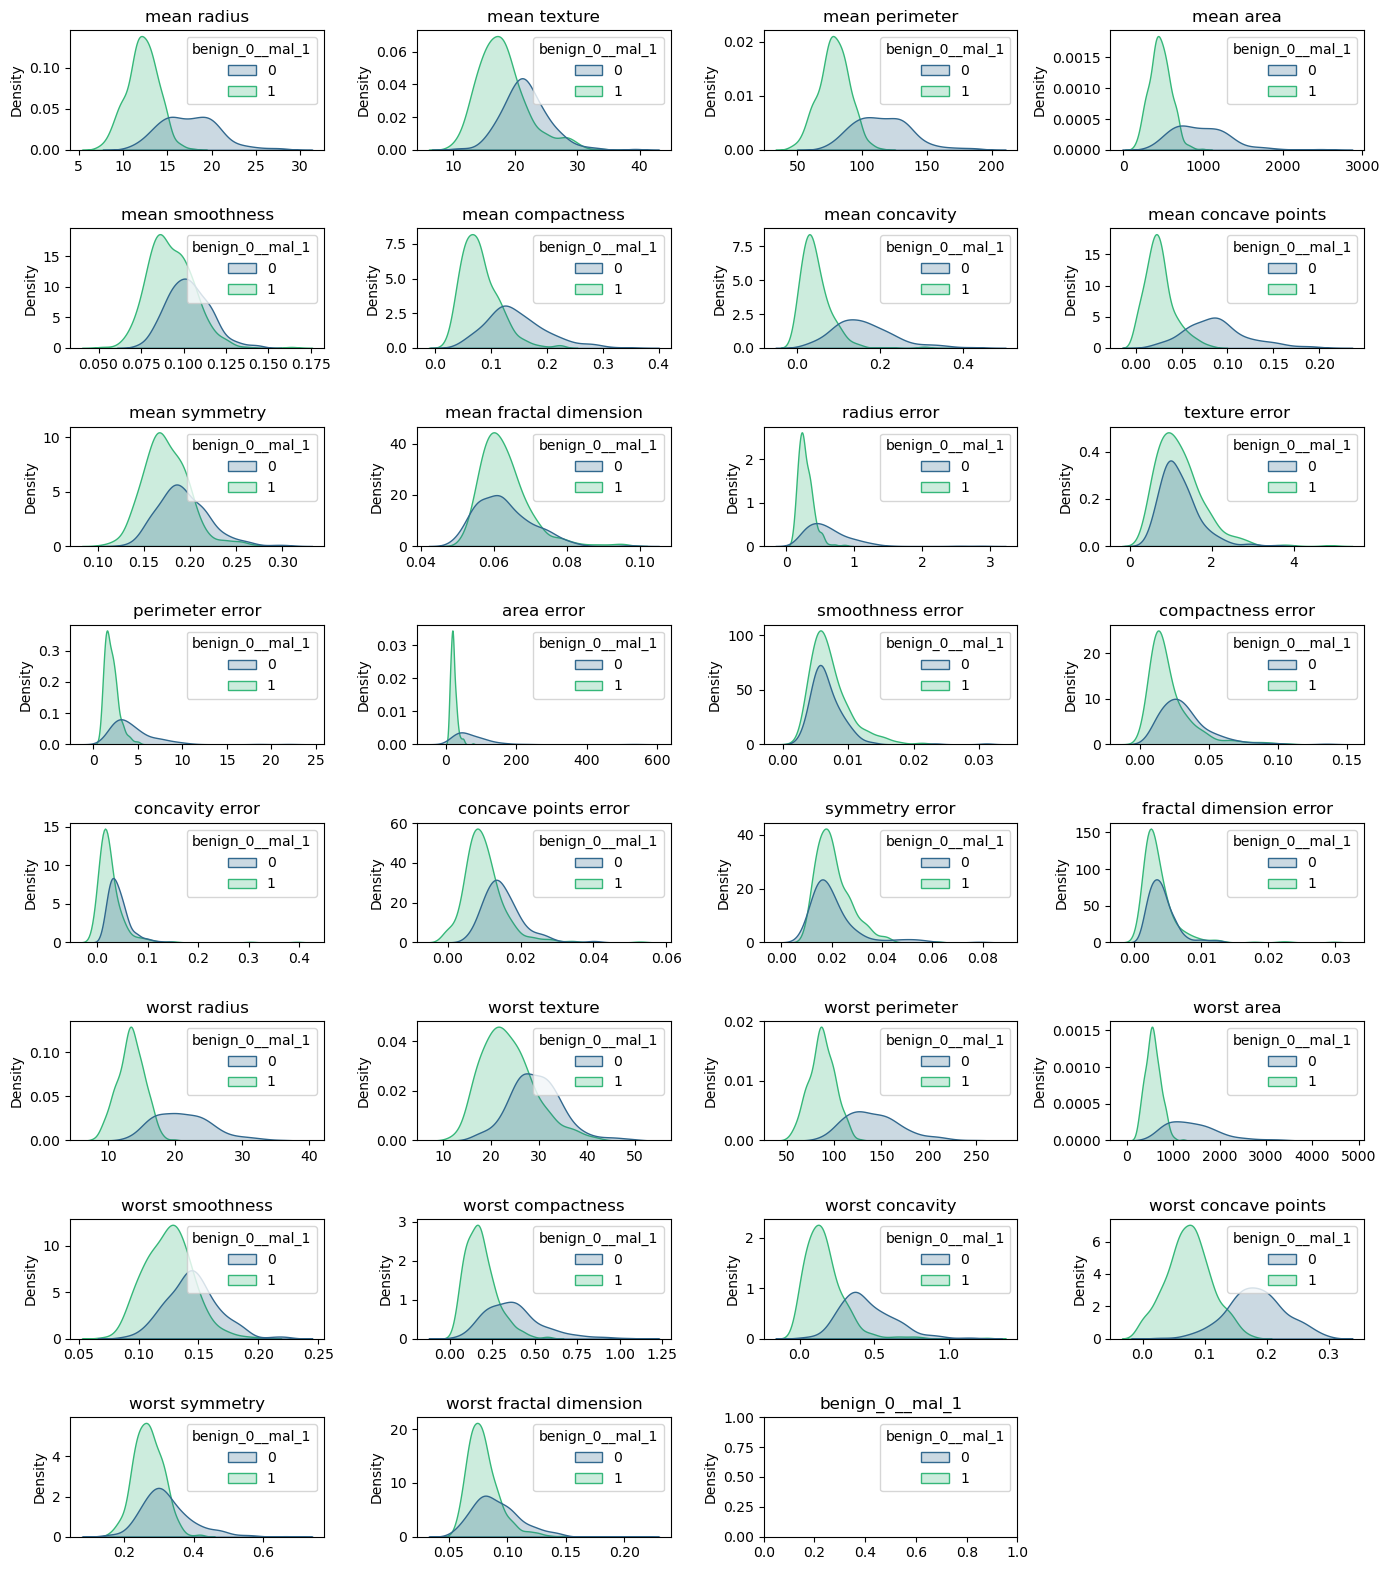

In [12]:
# numeric features analysis
plt.figure(figsize=(14,16))
for i in range(0,len(num)):
    plt.subplot(8,4,i+1)
    sns.kdeplot(x=eda[num[i]], palette='viridis', shade=True, hue=eda['benign_0__mal_1'])
    plt.title(num[i])
    plt.xlabel(' ')
    plt.tight_layout()

<AxesSubplot:>

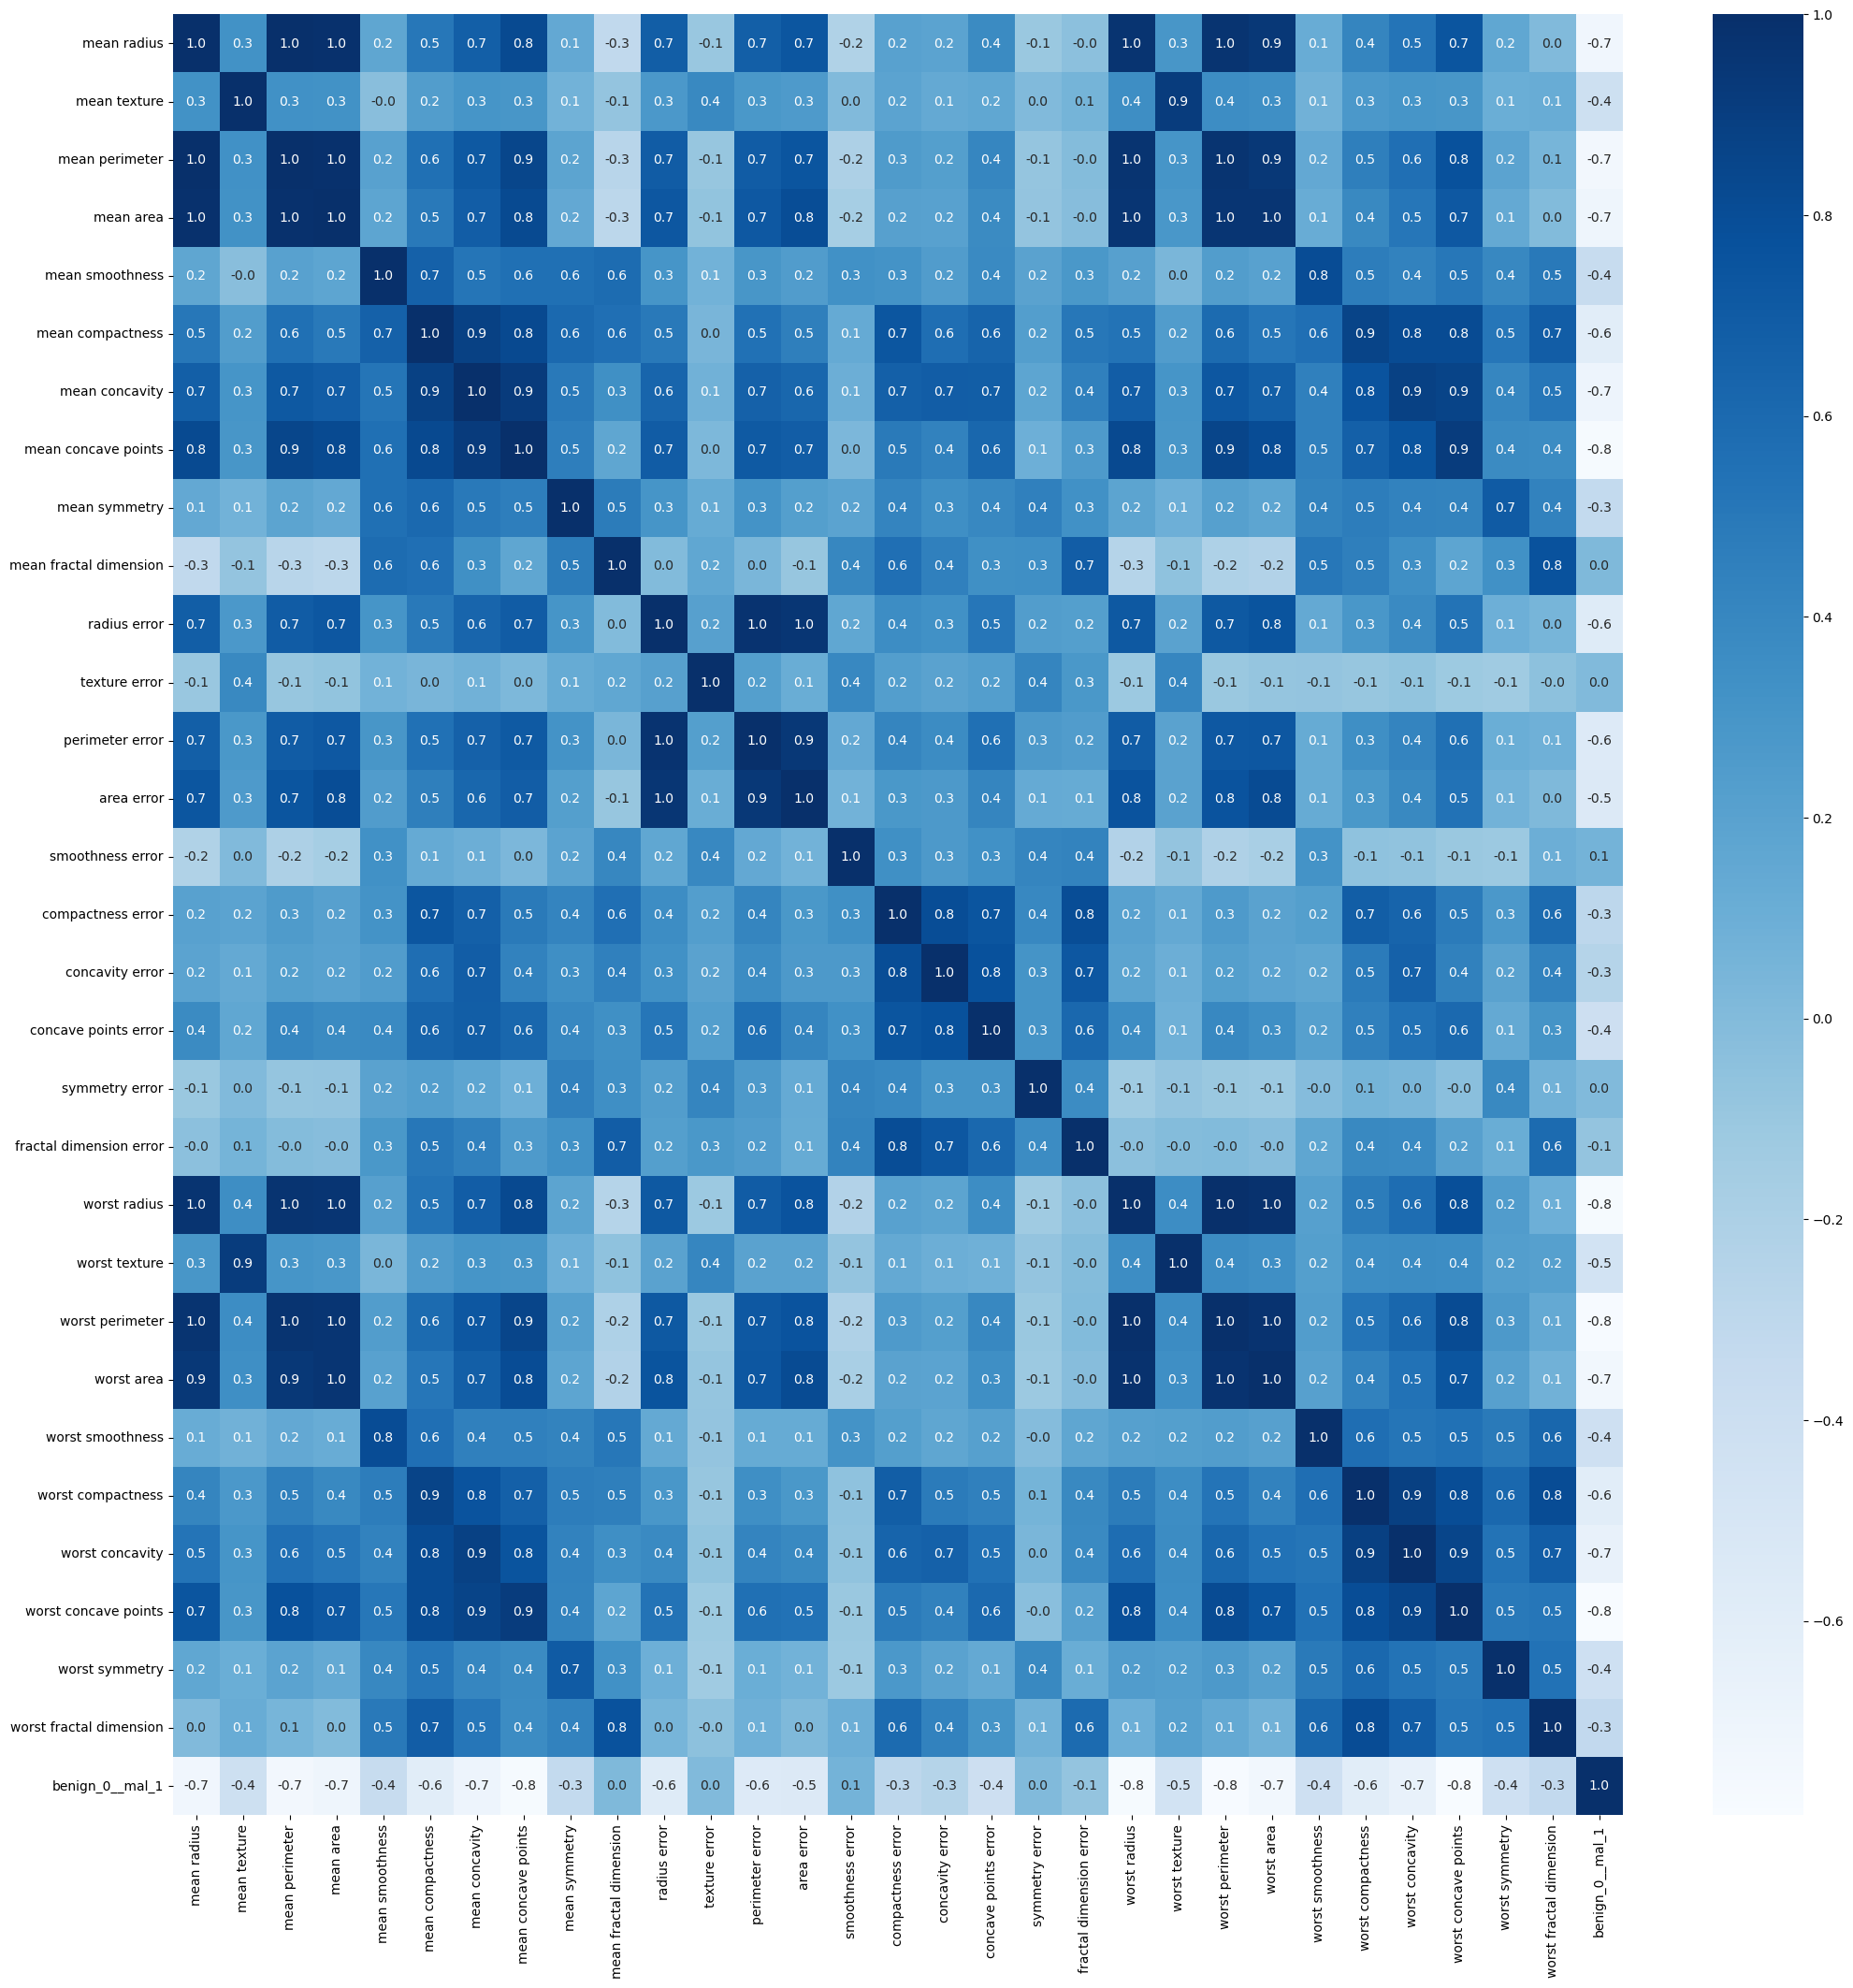

In [16]:
# Create Heatmap Correlation Chart for Each Numerical Features

plt.figure(figsize=(25, 25))
sns.heatmap(eda.corr(), cmap='Blues', annot=True, fmt='.2f')

In [17]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

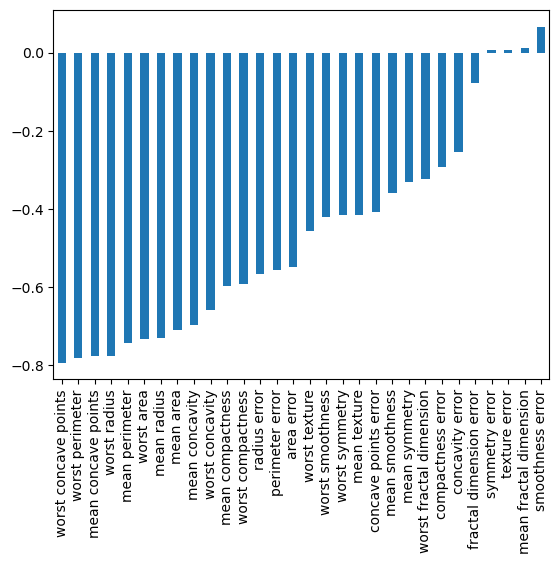

In [18]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

# Pre Processing

## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

X_train.shape, X_test.shape

((426, 30), (143, 30))

## Scaling Data

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

## Modeling Building

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [22]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

2022-08-06 21:27:46.438862: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Training the Model

In [23]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
14/14 [==============================] - 2s 20ms/step - loss: 0.6559 - val_loss: 0.6391
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6189 - val_loss: 0.5943
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5680 - val_loss: 0.5390
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5076 - val_loss: 0.4801
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4533 - val_loss: 0.4264
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4010 - val_loss: 0.3746
Epoch 7/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3521 - val_loss: 0.3246
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3073 - val_loss: 0.2847
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2719 - val_loss: 0.2497
Epoch 10/600
14/14 [==============================] - 0s 12ms/step - loss: 0.2415 - val_loss: 0.2233
Epoch 1

## Model Loss

<AxesSubplot:>

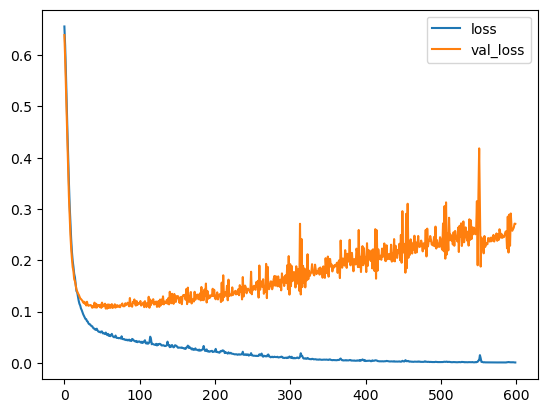

In [25]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

## Model Building 2

In [26]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

## Model Training 2

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
14/14 [==============================] - 1s 32ms/step - loss: 0.6935 - val_loss: 0.6718
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6602 - val_loss: 0.6438
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6319 - val_loss: 0.6153
Epoch 4/600
14/14 [==============================] - 0s 20ms/step - loss: 0.6018 - val_loss: 0.5827
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5673 - val_loss: 0.5440
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5269 - val_loss: 0.4992
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4784 - val_loss: 0.4465
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4315 - val_loss: 0.3975
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3862 - val_loss: 0.3553
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3493 - val_loss: 0.3179
Epoch

<AxesSubplot:>

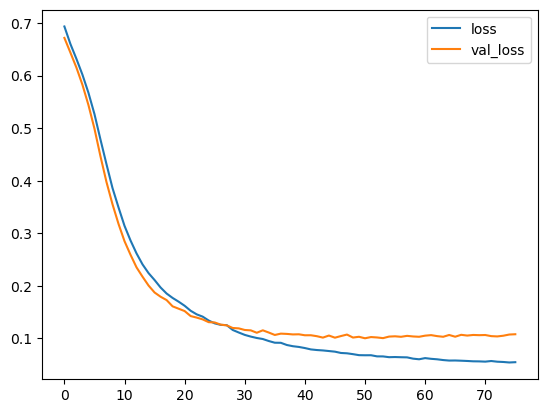

In [29]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Model Evaluation

In [31]:
predictions =(model.predict(X_test)>0.5).astype('int32')

5/5 [==============================] - 0s 3ms/step


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [33]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
